In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.decomposition import PCA

In [2]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 793.3 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.7 MB 991.5 kB/s eta 0:00:08
   ---- ----------------------------------- 1.0/8.7 MB 1.1 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.7 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/8.7 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.7 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.7 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.7 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 1.5 MB/s eta 0:00:04
   ---------------- ----------------------- 3.7/8.7 MB 1.5 MB/s eta 0:00:04
   ------------------ -------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn
print(sklearn.__version__)


1.7.2


# 1. Load a sample image (you can replace this with your own)

In [6]:

china = load_sample_image("china.jpg")
image = np.array(china, dtype=float) / 255  # normalize pixel values between 0 and 1

# Convert to grayscale for simplicity
gray_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# 2. Display the original image

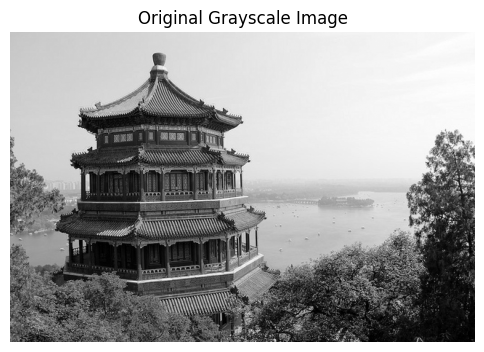

In [7]:
plt.figure(figsize=(6, 6))
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# 3. Apply PCA for compression

In [8]:
n_components = 50  # number of principal components to keep
pca = PCA(n_components=n_components)
transformed = pca.fit_transform(gray_image)

In [9]:
# 4. Reconstruct the image using the principal components
reconstructed = pca.inverse_transform(transformed)

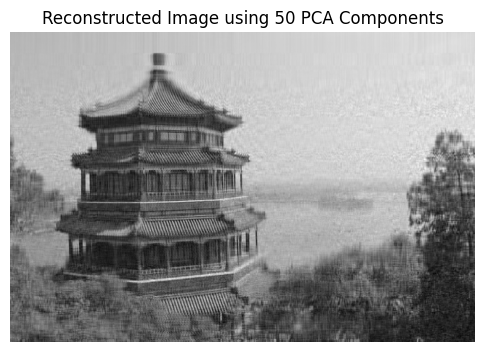

In [10]:
# 5. Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.title(f"Reconstructed Image using {n_components} PCA Components")
plt.imshow(reconstructed, cmap='gray')
plt.axis('off')
plt.show()

# 6. Compare compression ratio

In [11]:
original_size = gray_image.size
compressed_size = transformed.size + pca.components_.size
compression_ratio = compressed_size / original_size

print("Original Image Size:", original_size)
print("Compressed (PCA) Representation Size:", compressed_size)
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"Explained Variance Ratio (total): {np.sum(pca.explained_variance_ratio_):.2f}")

Original Image Size: 273280
Compressed (PCA) Representation Size: 53350
Compression Ratio: 0.20
Explained Variance Ratio (total): 0.95
